<a href="https://colab.research.google.com/github/Soooobiniya/2022F-Ajou-ML/blob/main/HW3_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW3 :: Parameter Tuning and Classifcation**

## 코랩과 구글 드라이브 연동 OR 로컬에서 파일 업로드
- 해당 섹션 코드 수정 가능

In [1]:
# 연동 OR 파일 업로드
# 연동 시 path 설정 주의

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터 불러오기

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('/content/drive/MyDrive/airline_sampled2.csv') 
# HW1에서 사용한 데이터를 샘플링한 파일이므로 꼭 제공된 csv 파일을 사용할 것

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,8827,8858,0,1,27,1,2,183,4,4,...,5,4,3,4,3,4,5,0,7.0,0
1,3588,3601,1,0,22,1,0,829,2,3,...,1,1,3,3,3,3,1,4,4.0,0
2,1011,1017,0,0,23,1,2,1020,4,5,...,4,3,4,5,3,5,4,0,0.0,1
3,7212,7237,1,0,21,1,0,1028,4,4,...,3,3,3,2,5,4,3,0,0.0,1
4,5025,5044,1,1,67,0,0,626,3,4,...,2,2,3,2,5,2,3,0,0.0,0


## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']
y = y.astype('int')
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=1)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (800, 24)
y_train's shape :  (800,)

X_val's shape :  (100, 24)
y_val's shape :  (100,)

X_test's shape :  (100, 24)
y_test's shape :  (100,)


## 문제1 KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.



In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

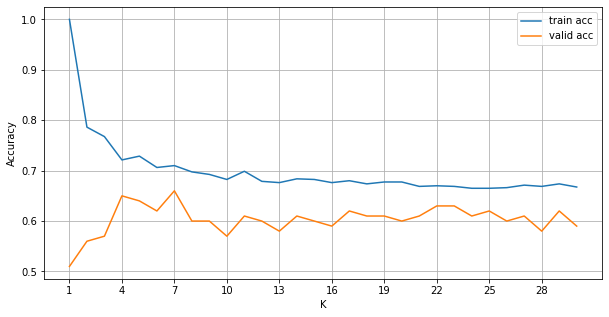

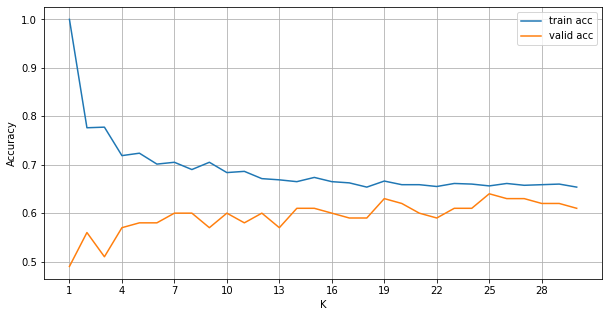

KNN Classifier의 Test Accuracy는 0.68


In [8]:
### 문제 1 ###
### 코드 작성 ###
k_parameter = range(1,31) # k 값을 1~30으로 변경하며 성능 체크.
M_train_acc_list = []
M_valid_acc_list = []

for k in k_parameter:
  model = KNeighborsClassifier(n_neighbors = k, p = 1) # Scikit-learn 라이브러리에 따르면 p=1일 경우, manhattan_distance

  model.fit(X_train, y_train) # 모델 학습
  predict = model.predict(X_val)

  train_result = model.score(X_train, y_train)
  M_train_acc_list.append(train_result)

  valid_result = model.score(X_val, y_val)
  M_valid_acc_list.append(valid_result)
  

plt.figure(figsize = (10,5))
plt.plot(k_parameter, M_train_acc_list, label = 'train acc')
plt.plot(k_parameter, M_valid_acc_list, label = 'valid acc')
plt.xlabel('K') # x축 이름 지정
plt.ylabel('Accuracy') # y축  이름 지정
plt.grid() # 눈금 표시
plt.xticks(range(1,31,3)) # 간격 지정
plt.legend() # 범례 표시
plt.show()

E_train_acc_list = []
E_valid_acc_list = []

for k in k_parameter:
  model = KNeighborsClassifier(n_neighbors = k, p = 2) # Scikit-learn 라이브러리에 따르면 p=2일 경우, euclidean_distance

  model.fit(X_train, y_train) # 모델 학습
  predict = model.predict(X_val)

  train_result = model.score(X_train, y_train)
  E_train_acc_list.append(train_result)

  valid_result = model.score(X_val, y_val)
  E_valid_acc_list.append(valid_result)

plt.figure(figsize = (10,5))
plt.plot(k_parameter, E_train_acc_list, label = 'train acc')
plt.plot(k_parameter, E_valid_acc_list, label = 'valid acc')
plt.xlabel('K') # x축 이름 지정
plt.ylabel('Accuracy') # y축  이름 지정
plt.grid() # 눈금 표시
plt.xticks(range(1,31,3)) # 간격 지정
plt.legend() # 범례 표시
plt.show()

# 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산
final_X = df.drop('satisfaction', axis=1)
final_y = df['satisfaction']
final_y = y.astype('int')

  
final_X_train, final_X_test, final_y_train, final_y_test = train_test_split(X, y, test_size=0.1, random_state=1) # 최종 학습을 위해 train set과 validation set 통합. 즉, 처음 상태로 설정.

best_knn = KNeighborsClassifier(n_neighbors = 7, p = 1)
best_knn.fit(final_X_train, final_y_train)
knn_pred = best_knn.predict(final_X_test)

print('KNN Classifier의 Test Accuracy는',metrics.accuracy_score(final_y_test, knn_pred))

**설명 작성**  
- 최적의 파라미터: 거리척도는 Manhattan distance, k는 7.
- 설명: train accuracy는 두가지 거리척도에 따라 측정했을 때, train accuracy는 모두 k=1일 때가 가장 좋았지만 이를 선택할 경우 overfitting이 된다. 따라서 validation accuracy가 가장 좋은 지점을 선택해야 한다. 두 그래프의 큰 차이는 없으나 비교 결과 거리척도는 Manhattan distance, k는 7일때가 가장 validation accuracy가 높으므로 이 때의 파라미터들을 선택한다.

---

## 문제2 Random Forest


- Scikit-learn 라이브러리를 이용하여 Random Forest의 최적의 파라미터를 찾는다.
    - Criterion 중 최소 두개를 비교한다.
    - 최적의 파라미터 max depth 값을 찾는다.
    - 파라미터에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 max depth 값, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [9]:
from sklearn.ensemble import RandomForestClassifier

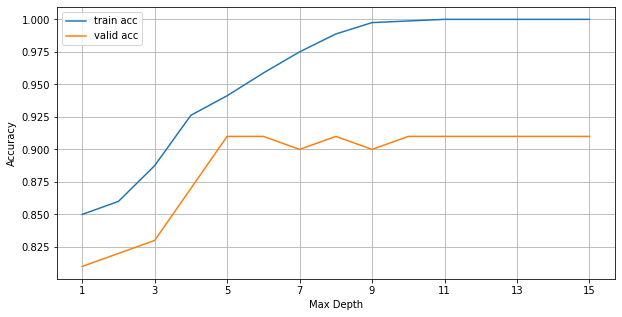

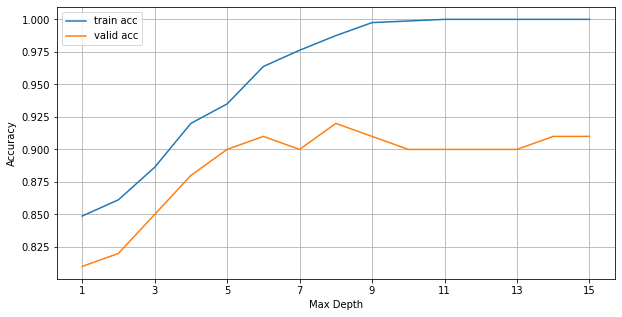

RandomForest Classifier의 Test Accuracy는 0.95


In [10]:
### 문제 2 ###
### 코드 작성 ###
depth_parameter = range(1,16) # depth 값을 1~15로 변경하며 성능 체크.

gini_train_acc_list = []
gini_valid_acc_list = []

for d in depth_parameter:
  model = RandomForestClassifier(criterion = 'gini', max_depth = d, random_state=10) # criterion = 'gini'일 경우이며 random_state를 고정해 같은 결과를 볼 수 있게 함.

  model.fit(X_train, y_train) # 모델 학습
  predict = model.predict(X_val)

  train_result = model.score(X_train, y_train)
  gini_train_acc_list.append(train_result)

  valid_result = model.score(X_val, y_val)
  gini_valid_acc_list.append(valid_result)
  

plt.figure(figsize = (10,5))
plt.plot(depth_parameter, gini_train_acc_list, label = 'train acc')
plt.plot(depth_parameter, gini_valid_acc_list, label = 'valid acc')
plt.xlabel('Max Depth') # x축 이름 지정
plt.ylabel('Accuracy') # y축  이름 지정
plt.grid() # 눈금 표시
plt.xticks(range(1,16,2)) # 간격 지정
plt.legend() # 범례 표시
plt.show()


entropy_train_acc_list = []
entropy_valid_acc_list = []

for d in depth_parameter:
  model = RandomForestClassifier(criterion = 'entropy', max_depth = d, random_state=10) # criterion = 'entropy'일 경우

  model.fit(X_train, y_train) # 모델 학습
  predict = model.predict(X_val)

  train_result = model.score(X_train, y_train)
  entropy_train_acc_list.append(train_result)

  valid_result = model.score(X_val, y_val)
  entropy_valid_acc_list.append(valid_result)
  

plt.figure(figsize = (10,5))
plt.plot(depth_parameter, entropy_train_acc_list, label = 'train acc')
plt.plot(depth_parameter, entropy_valid_acc_list, label = 'valid acc')
plt.xlabel('Max Depth') # x축 이름 지정
plt.ylabel('Accuracy') # y축  이름 지정
plt.grid() # 눈금 표시
plt.xticks(range(1,16,2)) # 간격 지정
plt.legend() # 범례 표시
plt.show()


best_rf = RandomForestClassifier(criterion = 'entropy', max_depth = 8, random_state=10)
best_rf.fit(final_X_train, final_y_train) # 최종 학습을 위해 train set과 validation set이 통합된 최종 training data set 사용.

rf_pred = best_rf.predict(final_X_test)

print('RandomForest Classifier의 Test Accuracy는', metrics.accuracy_score(final_y_test, rf_pred))

**설명 작성**  
- 최적의 파라미터: Criterion은 entropy, Max depth는 8.
- 설명: 트리를 너무 깊게 만들면 training data에 overfitting되므로 적절히 설정해야 한다. 따라서 validation accuracy가 가장 높고, overfiiting하지 않을 수 있도록 Criterion은 entropy, Max depth는 8을 선택한다.

---

## 문제3 Cross validation with Linear SVM
### 3-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 3-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

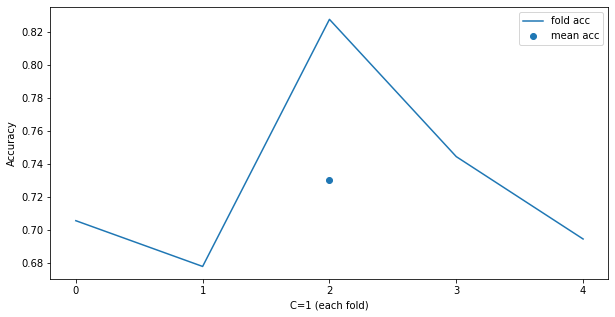

5-fold CV를 할 때, C=1일 경우 각 fold의 정확도는 [0.70555556 0.67777778 0.82777778 0.74444444 0.69444444] 이다.
그 때의 평균 정확도는 0.7300000000000001 이다.




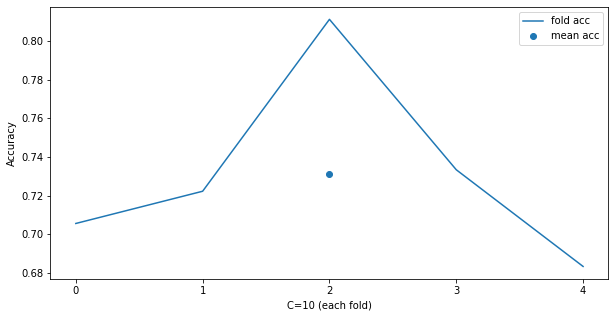

5-fold CV를 할 때, C=10일 경우 각 fold의 정확도는 [0.70555556 0.72222222 0.81111111 0.73333333 0.68333333] 이다.
그 때의 평균 정확도는 0.7311111111111112 이다.




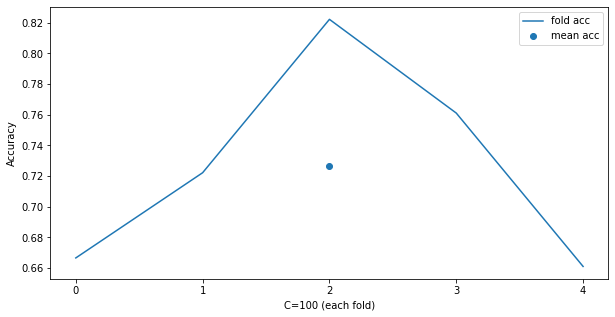

5-fold CV를 할 때, C=100일 경우 각 fold의 정확도는 [0.66666667 0.72222222 0.82222222 0.76111111 0.66111111] 이다.
그 때의 평균 정확도는 0.7266666666666667 이다.


linear SVM Classifier(by 5-fold CV)의 Test Accuracy는 0.76


In [11]:
### 문제 3-1 ###
### 코드 작성 ###
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

X_data = df[['Gender', 'Age', 'Class']] # 런타임이 너무 길게 나와 특정 feature들만 추출
y_data = df['satisfaction']
X_data = X_data.astype('int')
y_data = y_data.astype('int')

features = X_data.values
target = y_data.values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=15) # train data로 test data를 제외한 90%의 데이터를 사용


# linear SVM 모델의 파라미터 C가 1일 때
C_value = 1
clf = SVC(kernel='linear', C = C_value)
kfold = model_selection.KFold(n_splits = 5, shuffle=True, random_state = 50)
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=kfold)

plt.figure(figsize = (10,5))
plt.scatter(2, scores.mean(), label = 'mean acc') # 평균 값은 1개이므로 가운데에 점으로 표시
plt.plot(scores, label = 'fold acc') # 5개의 fold별 정확도 표시
plt.xlabel('C=1 (each fold)') # x축 이름 지정
plt.ylabel('Accuracy') # y축  이름 지정
plt.xticks(range(0,5)) # 간격 지정
plt.legend() # 범례 표시
plt.show()

print('5-fold CV를 할 때, C=1일 경우 각 fold의 정확도는', scores, '이다.')
print('그 때의 평균 정확도는', scores.mean(), '이다.\n\n') # C의 값이 달라짐에 따라 차이가 미세해 쉽게 알아볼 수 있도록 수치 표기


# linear SVM 모델의 파라미터 C가 10일 때
C_value = 10
clf = SVC(kernel='linear', C = C_value)
kfold = model_selection.KFold(n_splits = 5, shuffle=True, random_state = 50)
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=kfold)

plt.figure(figsize = (10,5))
plt.scatter(2, scores.mean(), label = 'mean acc') # 평균 값은 1개이므로 가운데에 점으로 표시
plt.plot(scores, label = 'fold acc') # 5개의 fold별 정확도 표시
plt.xlabel('C=10 (each fold)') # x축 이름 지정
plt.ylabel('Accuracy') # y축  이름 지정
plt.xticks(range(0,5)) # 간격 지정
plt.legend() # 범례 표시
plt.show()

print('5-fold CV를 할 때, C=10일 경우 각 fold의 정확도는', scores, '이다.')
print('그 때의 평균 정확도는', scores.mean(), '이다.\n\n')


# linear SVM 모델의 파라미터 C가 100일 때
C_value = 100
clf = SVC(kernel='linear', C = C_value)
kfold = model_selection.KFold(n_splits = 5, shuffle=True, random_state = 50)
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=kfold)

plt.figure(figsize = (10,5))
plt.scatter(2, scores.mean(), label = 'mean acc') # 평균 값은 1개이므로 가운데에 점으로 표시
plt.plot(scores, label = 'fold acc') # 5개의 fold별 정확도 표시
plt.xlabel('C=100 (each fold)') # x축 이름 지정
plt.ylabel('Accuracy') # y축  이름 지정
plt.xticks(range(0,5)) # 간격 지정
plt.legend() # 범례 표시
plt.show()

print('5-fold CV를 할 때, C=100일 경우 각 fold의 정확도는', scores, '이다.')
print('그 때의 평균 정확도는', scores.mean(), '이다.\n\n')

best_kf = SVC(kernel='linear', C = 10)
best_kf.fit(X_train, y_train)
kf_pred = best_kf.predict(X_test)

print('linear SVM Classifier(by 5-fold CV)의 Test Accuracy는',metrics.accuracy_score(y_test, kf_pred))


**설명 작성**  
- 최적의 파라미터: C=10.
- 설명: 우선, 24개의 feature 그대로 진행할 경우 runtime이 끝도 없이 길어져 임의로 3개의 feature만을 남기고 진행했다. C=1, 10, 100일 때를 비교한 결과 C=10일 경우에 평균 accuracy가 가장 좋았기 때문에 이 파라미터를 선택했다.

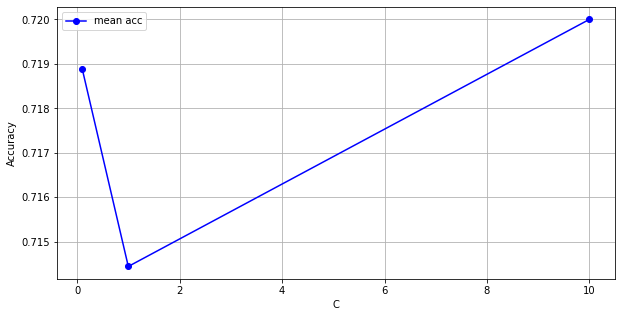

linear SVM Classifier(by 5-fold CV)의 Test Accuracy는 0.76


In [12]:
### 문제 3-2 ###
### 코드 작성 ###
from sklearn.model_selection import LeaveOneOut

c_parameter = [0.1, 1, 10]
loo_mean_list = []

# C= 0.1, 1, 10일 때를 비교
for c in c_parameter:
  clf = SVC(kernel='linear', C = c)
  loocv = LeaveOneOut()
  scores_loocv = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv = loocv)
  loo_mean_list.append(scores_loocv.mean())

plt.figure(figsize = (10,5))
plt.plot(c_parameter, loo_mean_list, 'bo-', label = 'mean acc') # C 값에 따라 평균 정확도를 그래프로 나타냄. 선택한 C 값만을 알아볼 수 있도록 점으로 추가 표시함
plt.xlabel('C') # x축 이름 지정
plt.ylabel('Accuracy') # y축  이름 지정
plt.grid() # 눈금 표시
plt.legend() # 범례 표시
plt.show()

best_loo = SVC(kernel='linear', C = 10)
best_loo.fit(X_train, y_train)
loo_pred = best_kf.predict(X_test)

print('linear SVM Classifier(by LOOCV)의 Test Accuracy는',metrics.accuracy_score(y_test, kf_pred))

**설명 작성**  
- 최적의 파라미터: C=10.
- 설명: 5-fold에서와 다르게 C 값으로 100 대신 0.1을 넣었다. 그래도 결과는 5-fold와 같이 C=10일 때가 가장 좋은 평균 정확도를 나타냈다. 따라서 최적의 파라미터로 C=10일 경우를 택했다.

---

## 문제4 Regression
문제 4 에서는 캘리포니아 주택 가격 데이터셋을 사용합니다.   
학습을 통해 주택 가격을 예측하는 문제입니다.  
데이터에 대한 자세한 설명은 아래 코드의 description을 참고해주세요.

In [52]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [53]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

In [54]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [55]:
print(df.shape) #(20640, 9)
print(df.describe())

(20640, 9)
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308  

### 문제 4-1 : Adjusted R2 Score
- sklearn.metrics 패키지를 사용하여 ```def adjr2```에 Adjusted R2 Score를 구하는 함수를 작성한다.
- ```def r2```를 사용하여 ```adjr2```를 구현한다.
- 코드 작성 영역 이외의 코드를 수정하지 않는다.
- 주어진 함수 파라미터를 사용하여 구현한다.

In [56]:
from sklearn.metrics import r2_score

In [57]:
import numpy as np

def r2(actual, predicted):
    """ R2 Score """
    return r2_score(actual, predicted)

###################################
def adjr2(actual, predicted, rowcount, featurecount):
############ 문제 4-1 ##############
    """ Adjusted R2 Score """
    return 1-(1-r2(actual,predicted))*(rowcount-1)/(rowcount-featurecount-1)

####################################
####################################

### 문제 4-2 : Feature Selection
- sklearn 패키지를 사용하여 feature selection을 수행하는 함수 ```forward_selection```을 구현한다.
- Linear Regressor 을 사용하여 feature selection이 어떻게 달라지는 지 관찰한다.
- 코드 작성 영역 이외의 코드를 수정하지 않는다.
- 주어진 변수들, 자료들을 최대한 활용하여 코드를 작성한다.

In [58]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [62]:
X = df.drop(columns=['target'])
y = df['target']
y=y.astype('int')
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


8

In [85]:
def forward_selection(X, y): # X: train data, y: train data's target
    initial_list = []
    included = list(initial_list) # 포함되어야 하는 feature
    best_r2 = 0 # 가장 높은 r2 score를 저장

    while True:

        changed = False # while 문을 빠져나가는 조건으로 활용
        excluded = list(set(X.columns)-set(included)) # included list에 없는 column names 저장하는 리스트
        
        print(X)





        new_scores = dict.fromkeys(excluded)

        for new_column in excluded:
            
            model = LinearRegression()

            ###########################################
            ###### 코드 작성 영역 외 수정 하지 말 것 #########
            ################ 문제 4-2 ##################
            model.fit(X, y)
            y_pred = model.predict(X)
            temp = adjr2(y, y_pred, X.shape[0], X.shape[1])
            print(temp)
            if temp > best_r2:
              best_r2 = temp
              changed = True
              
        
        included.append(new_column)
        X.append(included)


        ##############################################
        ##############################################
 
    return included

selected_features = forward_selection(X, y)
print('selected_features:', selected_features)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

KeyboardInterrupt: ignored

### 문제 4-3: Regularized Model
- Scikit-learn 라이브러리를 사용하여 Ridge Regression과 Lasso Regression 모델을 만든다.
- train : validation : test **데이터셋의 비율을 8:1:1**로 설정한다.
- 문제 4-1의 **forward selection을 통해 얻은 feature만**을 가진 데이터를 사용한다.
- 다양한 alpha 값에 대해 validation dataset을 사용하여 각 모델에 대한 **최적의 alpha 값을 찾고 찾은 최적의 alpha 값을 텍스트 셀에 작성**한다.
- alpha 값은 아래의 리스트를 사용한다.  
```alpha = [0.0001, 0.001,0.01,0.1,1,10, 100, 1000, 10000, 100000]```
- alpha 값에 대한 R2 score의 변화를 그래프로 나타낸다.
  * **x축: alpha 값**
  * **y축: R2 score 값**
  * 파란색 선: Ridge 결과, 빨간색 선: Lasso 결과
  * 그래프에 **legend**가 포함되어 있어야 한다. 
- **train과 validation dataset을 합하여 train set을 만든 후 최종 학습 결과를 도출**한다.
  * 최적의 alpha 값을 찾을 때 사용한 test set은 변하지 않는다. 
  * r2 score를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
import numpy as np

In [ ]:
### 문제 4-3 ###
### 코드 작성 ###

In [ ]:
### 문제 4-3 ###
### 그래프 작성 ###

- Rridge regression 모델 최적의 alpha 값:
- Lasso regression 모델 최적의 alpha 값:

In [ ]:
# 최종 결과 출력